<a href="https://colab.research.google.com/github/KimKangYeon/HW_/blob/master/%EA%B8%B0%EB%A7%90%EB%8C%80%EC%B2%B4%EA%B3%BC%EC%A0%9C_2014160078_%EA%B9%80%EA%B0%95%EC%97%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
from google.colab import files
files.upload()

Saving dataset.csv to dataset.csv


In [58]:
import numpy as np 
import pandas as pd 
import os
from sklearn.model_selection import train_test_split
import io
import time
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, normalize



raw_data = pd.read_csv("/content/dataset.csv")
raw_data.head(10)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,1237,1238,1239,1240,1241,1242,1243,1244,1245,1246,1247,1248,1249,1250,1251,1252,1253,1254,1255,1256,1257,1258,1259,1260,1261,1262,1263,1264,1265,1266,1267,1268,1269,1270,1271,1272,1273,1274,pubchem_id,Eat
0,0,73.516695,17.817765,12.469551,12.458130,12.454607,12.447345,12.433065,12.426926,12.387474,12.365984,12.342823,12.335925,12.328055,12.284265,12.269844,12.247357,10.557967,10.473721,9.225262,8.448526,7.611145,7.610874,7.580510,7.579386,7.576929,7.536001,7.517317,7.462578,7.459865,7.456214,7.447581,7.443458,7.423496,7.345785,7.323741,7.247088,7.230886,6.662523,6.286251,...,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,25004,-19.013763
1,1,73.516695,20.649126,18.527789,17.891535,17.887995,17.871731,17.852586,17.729842,15.864270,15.227643,15.202985,14.800045,12.855629,12.728858,12.618058,12.589962,12.557323,12.074893,10.607138,10.572061,10.464293,9.816674,9.456914,9.455816,8.865704,8.104048,8.006855,7.968817,7.946644,7.932943,7.922656,7.888724,7.885692,7.783220,7.637477,7.636586,7.631457,7.336591,7.127698,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25005,-10.161019
2,2,73.516695,17.830377,12.512263,12.404775,12.394493,12.391564,12.324461,12.238106,10.423249,8.698826,7.607776,7.550253,7.446675,7.398848,7.381532,7.355045,7.321944,6.625986,6.116315,6.106397,6.098066,5.989868,5.731750,5.700963,5.371527,5.008911,4.894453,4.826545,4.352232,4.270598,2.902330,2.902220,2.901834,2.901089,2.900168,2.900151,2.899983,2.898772,2.898551,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25006,-9.376619
3,3,73.516695,17.875810,17.871259,17.862402,17.850920,17.850440,12.558105,12.557645,12.517583,12.444141,12.420665,12.410312,12.346845,12.175480,12.098758,10.612802,10.610273,10.606738,10.606702,10.433290,8.694957,8.421582,8.103569,8.103345,7.595619,7.566897,7.555411,7.413109,7.403199,7.185256,6.915425,6.198245,6.191266,6.181797,6.152544,5.252689,5.244354,5.176740,5.176314,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25009,-13.776438
4,4,73.516695,17.883818,17.868256,17.864221,17.818540,12.508657,12.490519,12.450098,10.597068,10.595914,10.485270,8.595823,8.103880,8.103567,7.975189,7.546413,7.503300,6.803380,6.738768,5.169492,5.161869,5.145972,4.924911,4.899245,4.534996,4.486310,3.897466,3.081523,2.957823,2.903069,2.902178,2.900610,2.900542,2.900306,2.899368,2.899113,2.897739,2.896793,2.896063,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25011,-8.537140
5,5,53.358707,17.038820,16.981436,16.167446,16.137631,16.053239,15.713944,15.432893,15.421116,13.799676,13.799090,13.796055,13.794587,13.654476,13.653241,13.653190,13.652968,13.652967,13.652942,13.652823,13.652810,11.521619,11.356601,11.123762,10.808102,10.772564,10.564020,9.145761,9.145186,9.144210,9.143700,8.242546,7.968758,7.968416,7.965795,7.965569,7.937841,7.883080,7.882977,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25017,-16.169604
6,6,53.358707,17.040919,16.975955,16.168874,16.131888,16.073074,15.843838,15.638061,15.160532,13.712149,13.711387,13.703431,13.702534,13.655310,13.654319,13.653504,13.653129,13.653042,13.652386,13.652327,13.651539,12.665710,11.503352,11.350004,11.116042,10.898196,10.777931,10.592103,9.145801,9.144279,9.105266,8.372595,8.266926,8.160259,7.916957,7.916591,7.912025,7.911629,7.883283,...,0.0,0.0,0.0,0

In [61]:
data_fit=raw_data.drop(['Unnamed: 0','pubchem_id'],axis=1)
data_fit.shape

(16242, 1276)

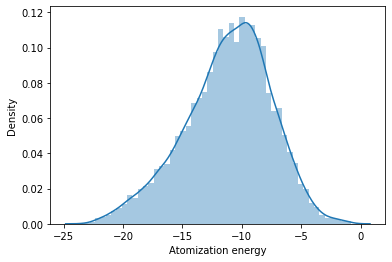

In [62]:
X = data_fit.drop(['Eat'], axis = 1)
Y = data_fit['Eat']

x=X.values
y=Y.values

y= pd.Series(y, name="Atomization energy")
sns.distplot(y)


In [64]:
X_standardized = StandardScaler().fit_transform(x)
X = X.fillna(x.mean())
X_normalized = normalize(x)

PCA

--- 0.27706027030944824 seconds ---
Number of components: 2
Explained variance:  0.6281696047575109


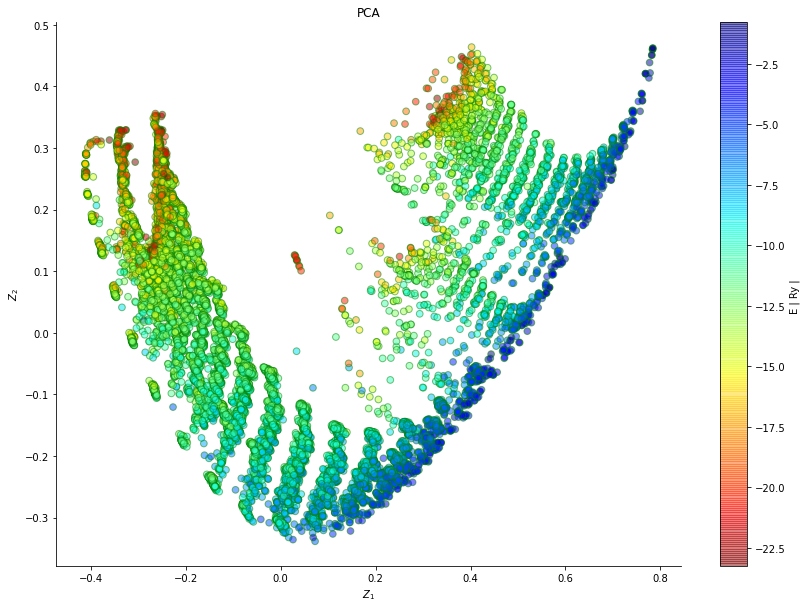

In [66]:
from sklearn.decomposition import PCA, KernelPCA

seed = 5
np.random.seed(seed)

pca = PCA(n_components=2, random_state=seed)

start_time = time.time()
X_reduced = pca.fit_transform(X_normalized)
print("--- %s seconds ---" % (time.time() - start_time))
print("Number of components: {}".format(pca.components_.shape[0]))
print("Explained variance: ", pca.explained_variance_ratio_.sum())

fig = plt.figure(figsize=(14,10))
ax  = fig.add_subplot(111)

scatter = ax.scatter(X_reduced[:,0], X_reduced[:,1], c=y, s=45, edgecolors='green', cmap=cm.jet_r, alpha=0.5)
colorbar = fig.colorbar(scatter, ax=ax, label = "E | Ry | ")
plt.xlabel(r'$Z_1$')
plt.ylabel(r'$Z_2$')
plt.title('PCA')
sns.despine()
plt.show()

PCA(with 2 components)가 original variance of data의 63% 이하만을 나타내므로 data를 2차원으로 visualize 하기위해 Kernel PCA 또는 t-SNE를 사용하겠습니다. 

KernelPCA

--- 5.322437286376953 seconds ---
Variance Explained:  1.0


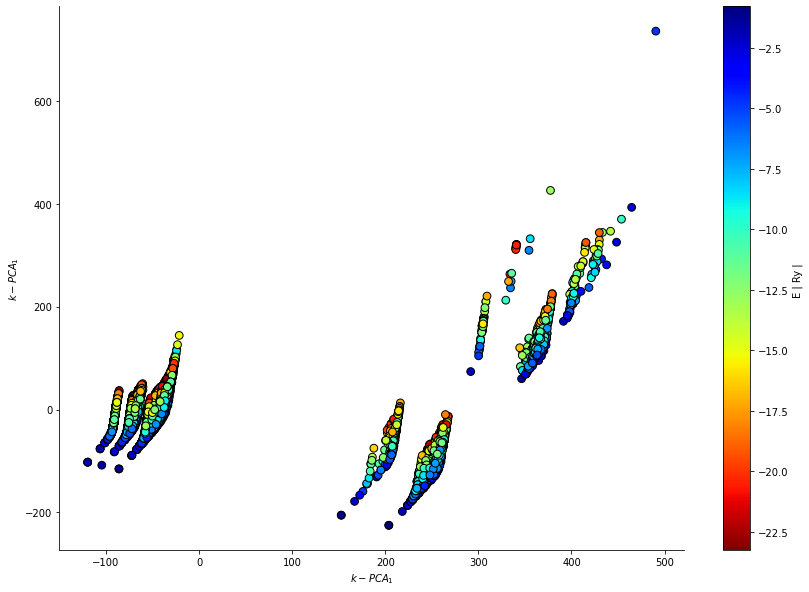

In [68]:
start_time = time.time()
kpca = KernelPCA(n_components=2, kernel="linear")
X_kpca = kpca.fit_transform(X)
print("--- %s seconds ---" % (time.time() - start_time))
explained_variance = np.var(X_kpca, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
print("Variance Explained: ", np.sum(explained_variance_ratio))

fig = plt.figure(figsize=(14,10))
ax  = fig.add_subplot(111)

scatter = ax.scatter(X_kpca[:,0], X_kpca[:,1], c=y, s=60, edgecolors='black', cmap=cm.jet_r)
colorbar = fig.colorbar(scatter, ax=ax, label = "E | Ry | ")
plt.xlabel(r'$k-PCA_1$')
plt.ylabel(r'$k-PCA_1$')
sns.despine()
plt.show()

Kernel PCA(with a linear kernel)은 the original variance of data를 2 components로 완벽히 설명하기 때문에 시각화의 목적에는 부합하지만 
range of the entries in the Coulomb Matrices가 2.906146에서 388.023441이기 때문에 normalize해주겠습니다.

KernelPCA : Normalized

--- 5.223025560379028 seconds ---
Variance Explained:  1.0


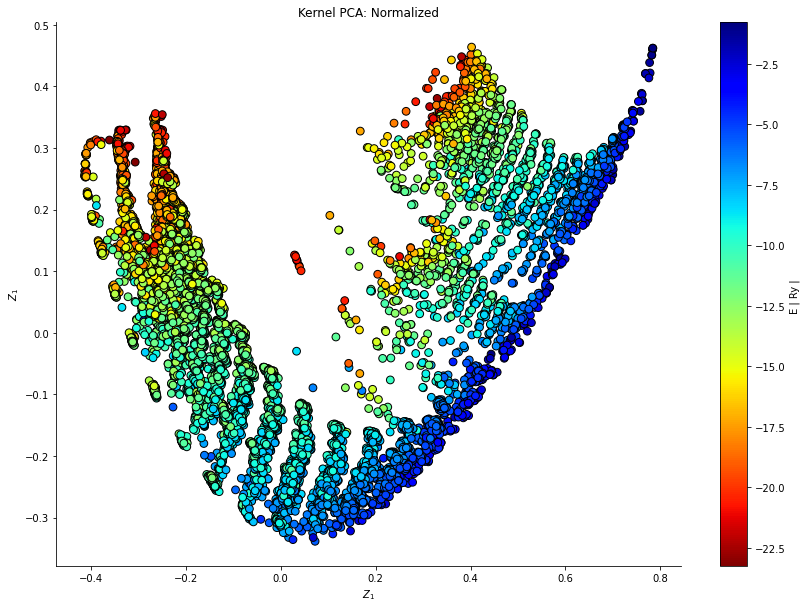

In [70]:
start_time = time.time()
kpca3 = KernelPCA(n_components=2, kernel="linear", random_state=seed)
X_kpca3 = kpca3.fit_transform(X_normalized)
print("--- %s seconds ---" % (time.time() - start_time))
explained_variance = np.var(X_kpca3, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
print("Variance Explained: ", np.sum(explained_variance_ratio))

fig = plt.figure(figsize=(14,10))
ax  = fig.add_subplot(111)

scatter = ax.scatter(X_kpca3[:,0], X_kpca3[:,1], c=y, s=60, edgecolors='black', cmap=cm.jet_r)
colorbar = fig.colorbar(scatter, ax=ax, label = "E | Ry | ")
plt.xlabel(r'$Z_1$')
plt.ylabel(r'$Z_1$')
plt.title('Kernel PCA: Normalized')
sns.despine()
plt.show()

T-SNE

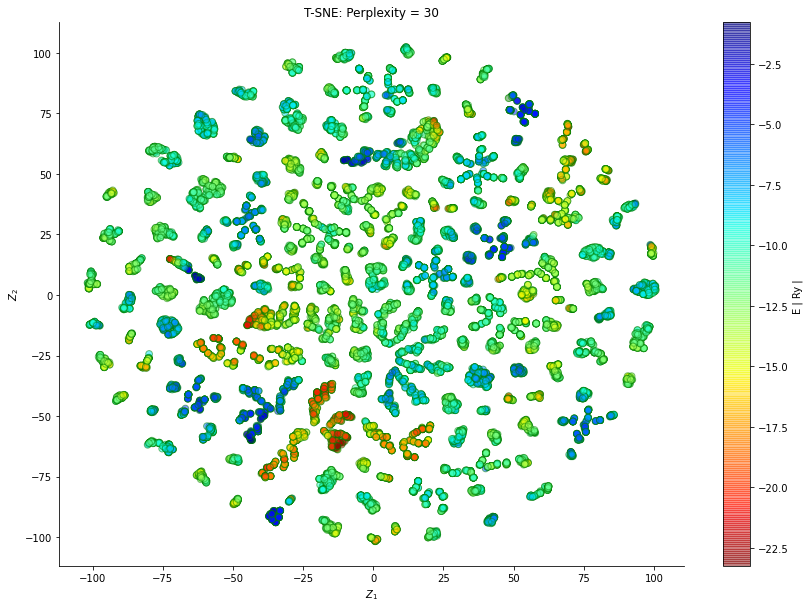

In [72]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=seed)
X_tsne = tsne.fit_transform(X_normalized)

fig = plt.figure(figsize=(14,10))
ax  = fig.add_subplot(111)

scatter = ax.scatter(X_tsne[:,0], X_tsne[:,1], c=y, s=45, edgecolors='green', cmap=cm.jet_r, alpha=0.5)
colorbar = fig.colorbar(scatter, ax=ax, label = "E | Ry | ")
plt.xlabel(r'$Z_1$')
plt.ylabel(r'$Z_2$')
plt.title('T-SNE: Perplexity = 30')
sns.despine()
plt.show()

학습에 영향을 주는 점들의 개수를 조절해주는 Perplexity를 30으로 설정한 t-SNE는 위와 같습니다.

Regression

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)

In [75]:
x_train.shape

(14617, 1275)

keras를 이용한 CNN 구현

In [77]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras import backend
from keras import regularizers
from keras.callbacks import EarlyStopping

In [79]:
model = Sequential()
model.add(Dense(1000, input_dim=x.shape[1],kernel_initializer='normal', activation='sigmoid'))
model.add(Dropout(0.25))
model.add(Dense(500,kernel_initializer='normal', activation='sigmoid'))
model.add(Dropout(0.25))
model.add(Dense(50,kernel_initializer='normal'))
model.add(Dropout(0.25))
model.add(Dense(1))

model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 1000)              1276000   
_________________________________________________________________
dropout_9 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 500)               500500    
_________________________________________________________________
dropout_10 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 50)                25050     
_________________________________________________________________
dropout_11 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                

In [87]:
model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

hist = model.fit(x_train, y_train, validation_data=(x_test,y_test), callbacks=[monitor], verbose=2, epochs=1000)


Epoch 1/1000
457/457 - 3s - loss: 1.4349 - val_loss: 0.2090
Epoch 2/1000
457/457 - 3s - loss: 1.4149 - val_loss: 0.1570
Epoch 3/1000
457/457 - 3s - loss: 1.3550 - val_loss: 1.0592
Epoch 4/1000
457/457 - 3s - loss: 1.3249 - val_loss: 0.1598
Epoch 5/1000
457/457 - 3s - loss: 1.3494 - val_loss: 0.1372
Epoch 6/1000
457/457 - 3s - loss: 1.2904 - val_loss: 0.1668
Epoch 7/1000
457/457 - 3s - loss: 1.2007 - val_loss: 0.3868
Epoch 8/1000
457/457 - 3s - loss: 1.1915 - val_loss: 0.2070
Epoch 9/1000
457/457 - 3s - loss: 1.1703 - val_loss: 0.1164
Epoch 10/1000
457/457 - 3s - loss: 1.1388 - val_loss: 0.1441
Epoch 11/1000
457/457 - 3s - loss: 1.1175 - val_loss: 0.1040
Epoch 12/1000
457/457 - 3s - loss: 1.0973 - val_loss: 0.1050
Epoch 13/1000
457/457 - 3s - loss: 1.0125 - val_loss: 0.1133
Epoch 14/1000
457/457 - 3s - loss: 1.0438 - val_loss: 0.2072
Epoch 15/1000
457/457 - 3s - loss: 1.0041 - val_loss: 0.1216
Epoch 16/1000
457/457 - 3s - loss: 0.9898 - val_loss: 0.0948
Epoch 17/1000
457/457 - 3s - loss

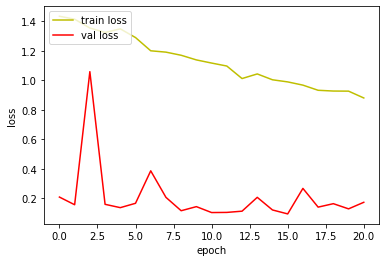

In [88]:
fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

plt.show()

In [89]:
model.evaluate(x_test, y_test)

51/51 [==============================] - 0s 2ms/step - loss: 0.1735


0.1735229343175888

In [94]:
predict_value = model.predict(x_test[4:6],verbose=1)

1/1 [==============================] - 0s 1ms/step


In [95]:
predict_value

array([[-22.053883 ],
       [-13.1033945]], dtype=float32)

In [97]:
y_test[4:6]

2157    -22.530841
11772   -13.473902
Name: Atomization energy, dtype: float64

y_test(참값)과 predict_value(모델을 돌려 예측한 값)는 약 0.02117 %, 0.02750 %의 오차를 보였다.

In [99]:
from keras.models import load_model

model.save('Atomization_energy_model.h3')

INFO:tensorflow:Assets written to: Atomization_energy_model.h3/assets
